# pointplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.pointplot()` библиотеки *seaborn* используется для построения точечных графиков, которые визуализируют категориальные данные. Этот вид графиков отображает различные статистические показатели (средняя, медиана, стандартное отклонение и пр.) и их доверительные интервалы для различных категорий.

Основные параметры функции `sns.pointplot()`:
- `data`: DataFrame, массив;
- `x, y, hue`: переменные для построения графика. X и Y задают координаты, а hue позволяет добавлять цветовое различие для дополнительной переменной;
- `hue_order`: порядок отображения категорий по параметру hue;
- `dodge`: логическое значение или число, определяющее сдвиг точек для разных значений категориальной переменной;
- `order`: порядок отображения категорий;
- `estimator`: функция, используемая для агрегирования данных. По умолчанию используется 'mean' (среднее значение);
- `n_boot`: количество выборок для вычисления доверительного интервала с помощью бутстрапа. По умолчанию n_boot=1000;
- `errorbar`: контролирует способ отображения ошибок на графике. По умолчанию errorbar=('ci', 95);
- `capsize`: длина черточек на концах доверительных интервалов. По умолчанию capsize=0;
- `markers`: стиль маркеров для точек. Можно указать символ или список символов для разных значений категориальной переменной;
- `linestyles`: стиль линий, соединяющих точки. Можно указать строку или список строк для разных значений категориальной переменной.

Работу функции `sns.pointplot()` разберём на данных из датасета `'diamonds'`. Загрузим этот датасет:

In [3]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


Содержание датасета:
- **carat (карат)**: Вес бриллианта в каратах. Карат - это единица измерения массы, которая равна 0.2 грамма;
- **cut (качество огранки)**: Категория, описывающая качество огранки бриллианта. Возможные значения: Fair (удовлетворительное качество), Good (хорошее качество), Very Good (очень хорошее качество), Premium (премиум качество), Ideal (идеальное качество);
- **color (цвет)**: Отражает цвет бриллианта. Международная система GIA описывает наивысший цвет латинской буквой D, и далее по нисходящей идут цвета E, F, G, H, I, J и т.д. Маркировка цвета D означает "бесцветный" и является наиболее ценным;
- **clarity (чистота)**: Оценка чистоты бриллианта, то есть наличия или отсутствия дефектов. Значения варьируются от I1 (с наибольшими дефектами) до IF (без включений);
- **depth (глубина)**: Процентное соотношение максимальной глубины бриллианта к его среднему диаметру;
- **table (таблица)**: Процентное соотношение ширины верхней грани бриллианта к его общей ширине;
- **price (цена)**: Цена бриллианта в долларах США;
- **x (длина)**: Длина бриллианта в миллиметрах;
- **y (ширина)**: Ширина бриллианта в миллиметрах;
- **z (глубина)**: Глубина бриллианта в миллиметрах.

Итак, построим график `pointplot` по столбцу `'price'`:

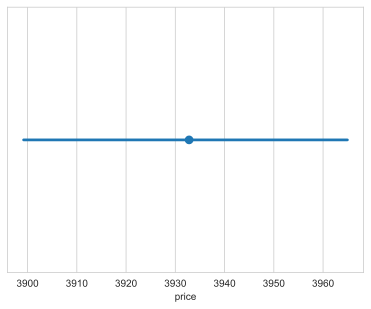

In [5]:
sns.set_style('whitegrid')

sns.pointplot(data=diamonds, x='price');

В итоге, на графике отобразилась одна точка с некоторым доверительным интервалом. Значение этой точки соответствует значению средней арифметической по всем ценам на бриллианты, содержащимся в столбце `'price'`.

Давайте по второй оси отобразим цвета бриллиантов:

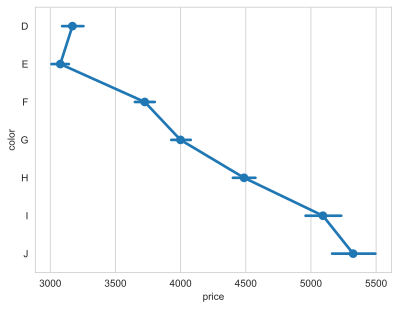

In [6]:
sns.pointplot(data=diamonds, x='price', y='color');

Теперь на графике отображены средние по каждой категории цвета бриллиантов.

Избавиться от линии, связывающей точки на графике, можно при помощи параметра `linestyles`, которому, в данном случае, нужно передать значение `'none'`:

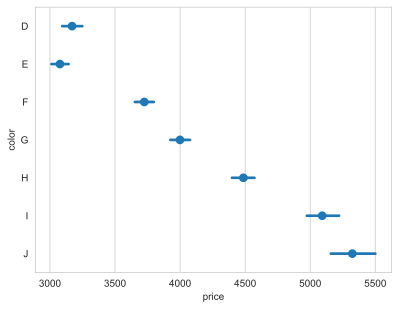

In [7]:
sns.pointplot(data=diamonds, x='price', y='color',
              linestyles='none');

Или, применив параметр `hue`:

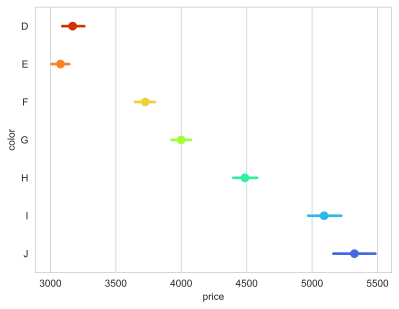

In [8]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              hue='color');

**Параметр estimator**

Параметр `estimator` позволяет выбирать способ агрегирования данных перед их визуализацией. По умолчанию применяется средняя `'mean'`.

Можно применять разные статистики. Например, построим график с медианными значениями:

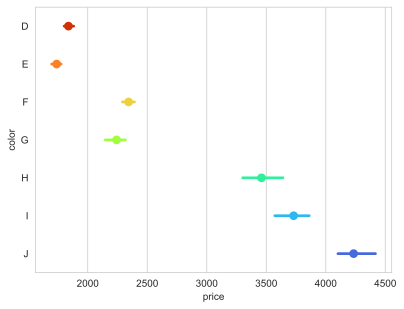

In [9]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator='median',
              hue='color');

Или, например, передадим функцию стандартного отклонения:

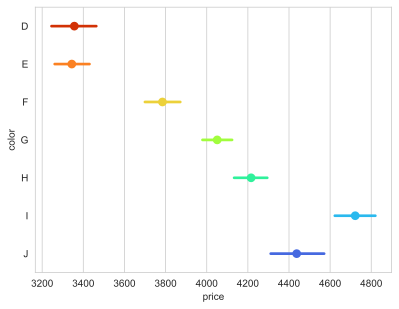

In [10]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator=np.std,
              hue='color');

А также можно использовать свою логику для агрегирования данных. Например, создадим пользовательскую функцию, которая вычисляет разницу между максимумом и минимумом:

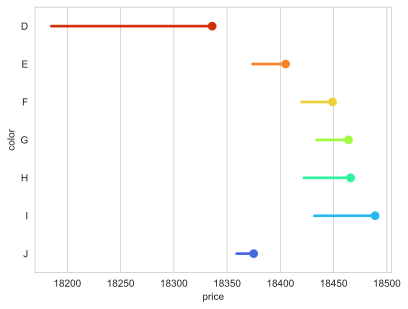

In [11]:
def my_func(value):
    return (value.max() - value.min())

sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator=my_func,
              hue='color');

**Параметр capsize**

Параметр `capsize` в функции `sns.pointplot()` используется для управления длиной рисок на концах линий ошибок. По умолчанию они не показываются на графике.

Отразим риски на диаграмме:

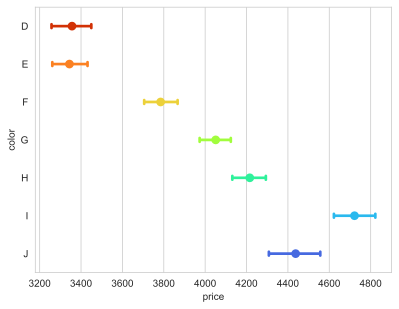

In [12]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator=np.std,
              hue='color',
              capsize=0.1);

Или сделаем их размером побольше:

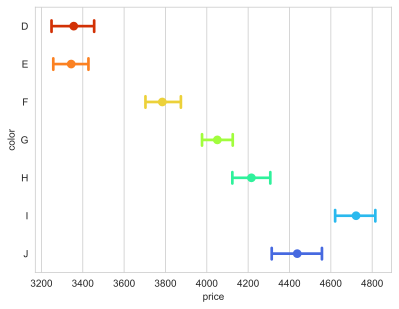

In [13]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator=np.std,
              hue='color',
              capsize=0.3);

Разобьём категории на подкатегории с применением параметра `hue`:

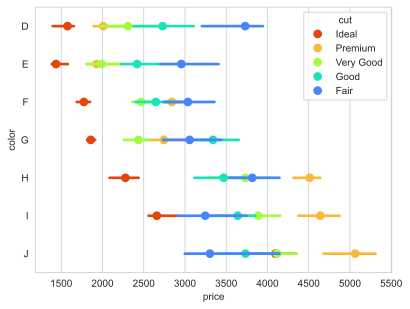

In [14]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              linestyle='none',
              estimator='median',
              hue='cut');

В данном случае, линии доверительных интервалов накладываются друг на друга. Параметром `dodge` можно устанить это наложение:

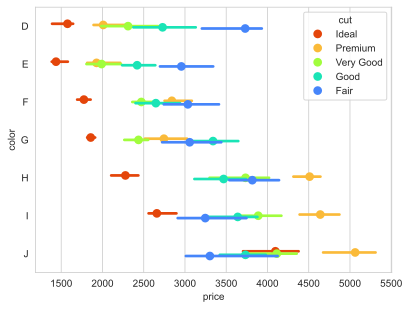

In [15]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              linestyle='none',
              estimator='median',
              hue='cut',
              dodge=True);

Параметром `dodge=True` пересечение линий устранилось не полностью, поэтому применим числовое значение:

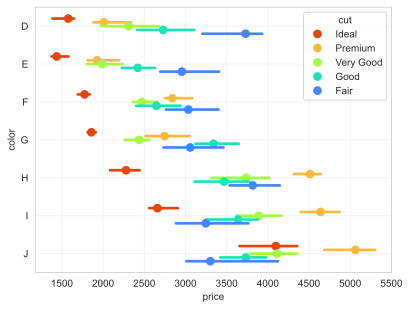

In [16]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              linestyle='none',
              estimator='median',
              hue='cut',
              dodge=0.4)

plt.grid(alpha=0.3);

Параметр `markersize` позволяет управлять размером точек. Например, сделаем их диаметр меньше:

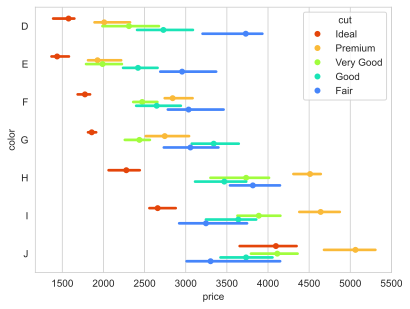

In [17]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              linestyle='none',
              estimator='median',
              hue='cut',
              dodge=0.4,
              markersize=4);

А параметром `err_kws` можно управлять шириной линий доверительных интервалов:

**Параметр errorbar**

Параметр `errorbar` функции `sns.pointplot()` контролирует способ отображения ошибок на графике. Он позволяет настроить, каким образом будут отображаться доверительные интервалы или ошибки, соответствующие данным.

Основные опции для параметра `errorbar`:
- `'ci'`: Отображение доверительного интервала. Формат: ('ci', значение), где значение - размер доверительного интервала в процентах. По умолчанию errorbar=('ci', 95) - отображает 95%-й доверительный интервал.
- `'pi'`: Отображение предсказательного интервала. Формат: errorbar=('pi', значение), где значение - это размер предсказательного интервала в процентах.
- `'se'`: Отображение стандартной ошибки. Формат: errorbar=('se', значение), где значение - множитель для стандартной ошибки (обычно 1).
- `'sd'`: Отображение стандартного отклонения. Формат: errorbar=('sd', значение), где значение - множитель для стандартного отклонения.
- `None`: Отключение отображения ошибок.

Диаграмма с параметром по умолчанию:

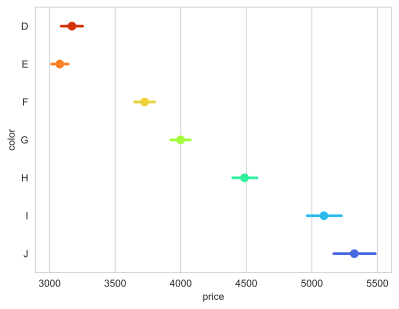

In [18]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator='mean',
              hue='color');

95%-й доверительный интервал:

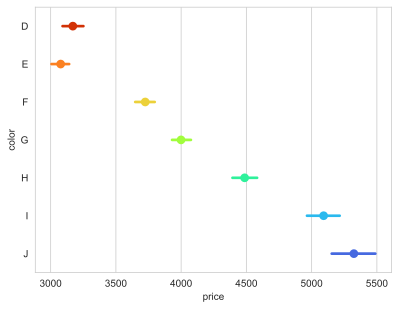

In [19]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator='mean',
              hue='color',
              errorbar=('ci', 95));

Отображение стандартного отклонения:

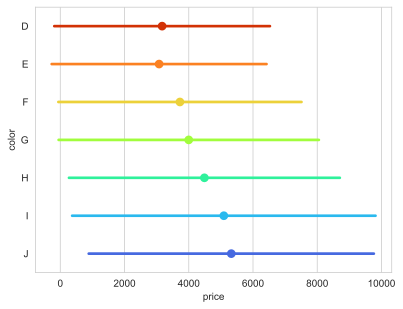

In [20]:
sns.pointplot(data=diamonds, x='price', y='color',
              palette='turbo_r',
              estimator='mean',
              hue='color',
              errorbar='sd');

Для демонстрации графика без отображения линий доверительных интервалов для начала построим диаграмму со связующими точки линиями:

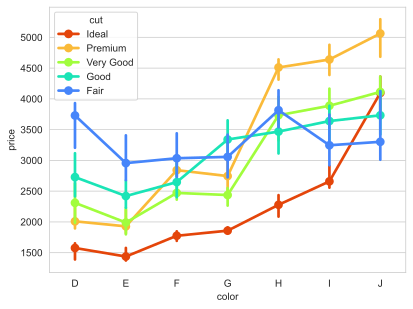

In [21]:
sns.pointplot(data=diamonds, x='color', y='price',
              palette='turbo_r',
              estimator='median',
              hue='cut');

В данном случае график получился немного "перегруженым", поэтому для улучшения читаемости диаграммы, удалим линии доверительных интервалов:

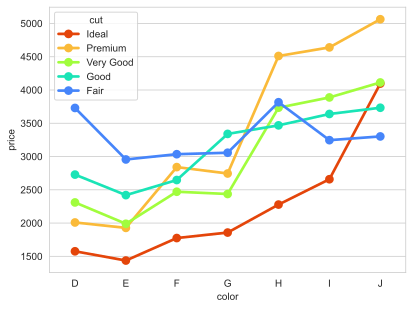

In [22]:
sns.pointplot(data=diamonds, x='color', y='price',
              palette='turbo_r',
              estimator='median',
              hue='cut',
              errorbar=None);